In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')
df.dropna()
df['Unnamed: 32'].tail()
df = df.drop(['Unnamed: 32'], axis =1)

In [3]:
df['diagnosis_'] = df['diagnosis'].values
df = df.drop(['diagnosis', 'id'], axis =1)
df['diagnosis'] = df['diagnosis_'].values
df = df.drop(['diagnosis_'], axis =1)
df.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
from sklearn.preprocessing import Imputer, LabelEncoder

lbl = LabelEncoder()

d = lbl.fit_transform(df.diagnosis.values)


df['diagnosis'] = d

df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [5]:
df.shape

(569, 31)

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                  y, 
                                                  test_size= 0.2, 
                                                  random_state = 42, 
                                                  shuffle=True)
X_train.head(2)
X_train
y_train
df.columns.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis'], dtype=object)

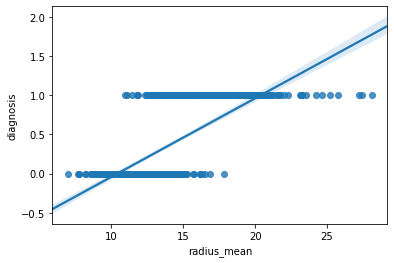

In [8]:
plot=sns.regplot(x='radius_mean', y='diagnosis', data = df) 

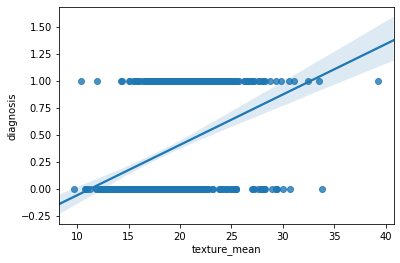

In [9]:
plot2= sns.regplot(x='texture_mean', y='diagnosis', data = df)

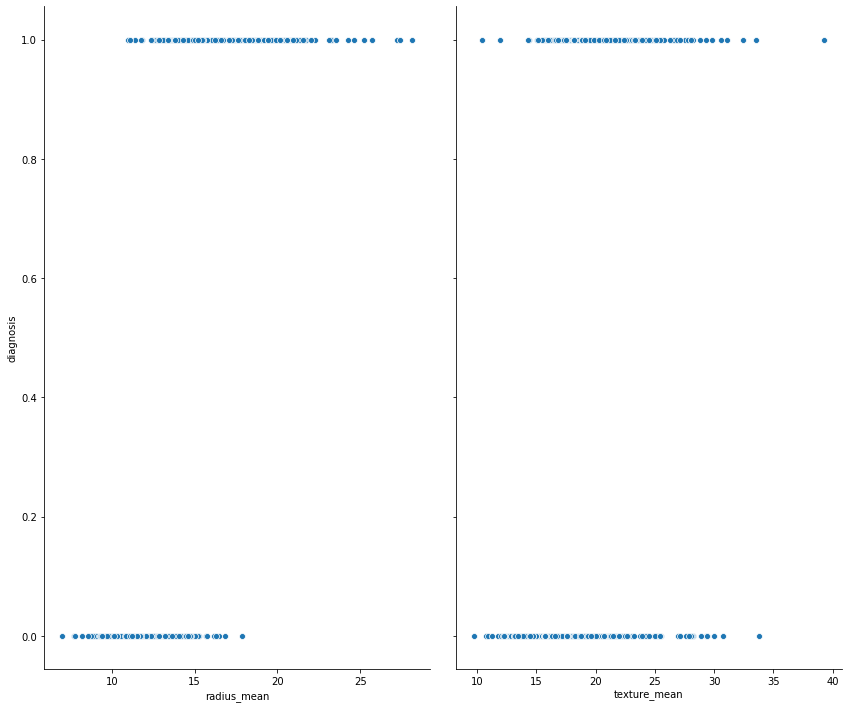

In [10]:
sns.pairplot(data = df, x_vars=X.columns.values[:2], y_vars='diagnosis',height= 10,aspect= 0.6)

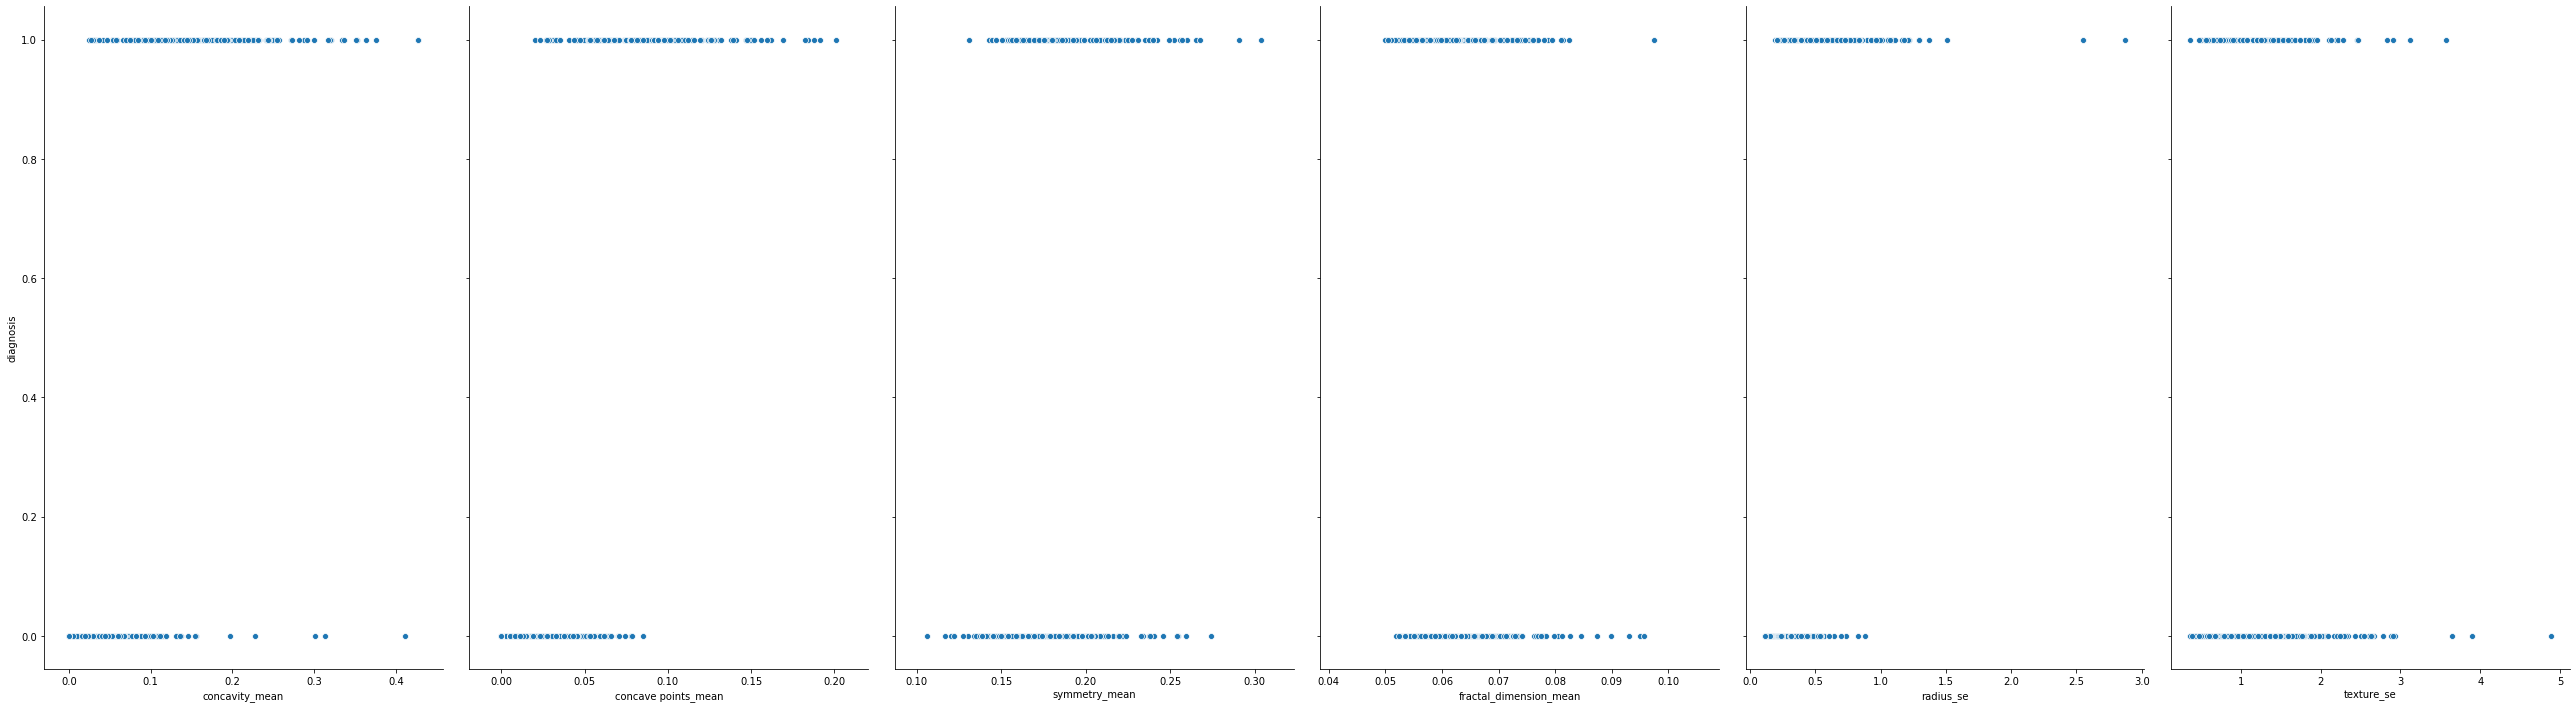

In [33]:
sns.pairplot(data = df, x_vars=X.columns.values[6:12], y_vars='diagnosis',height= 10,aspect= 0.6)

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.956140350877193